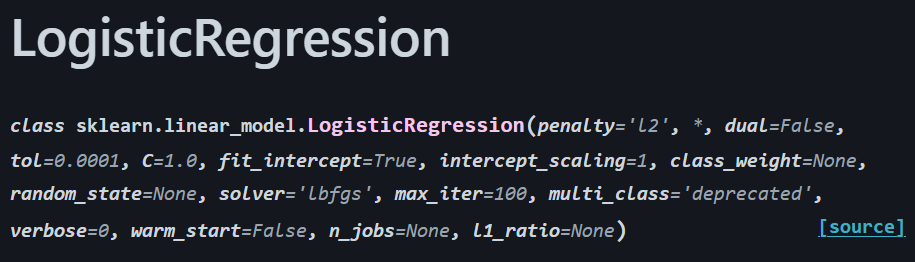

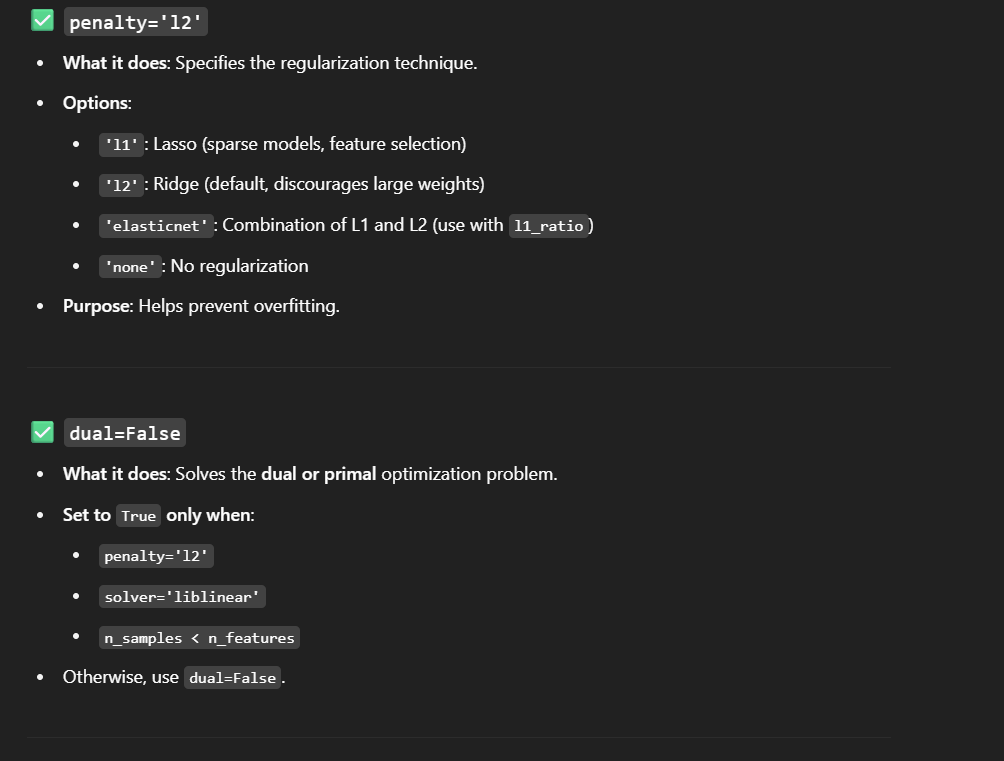
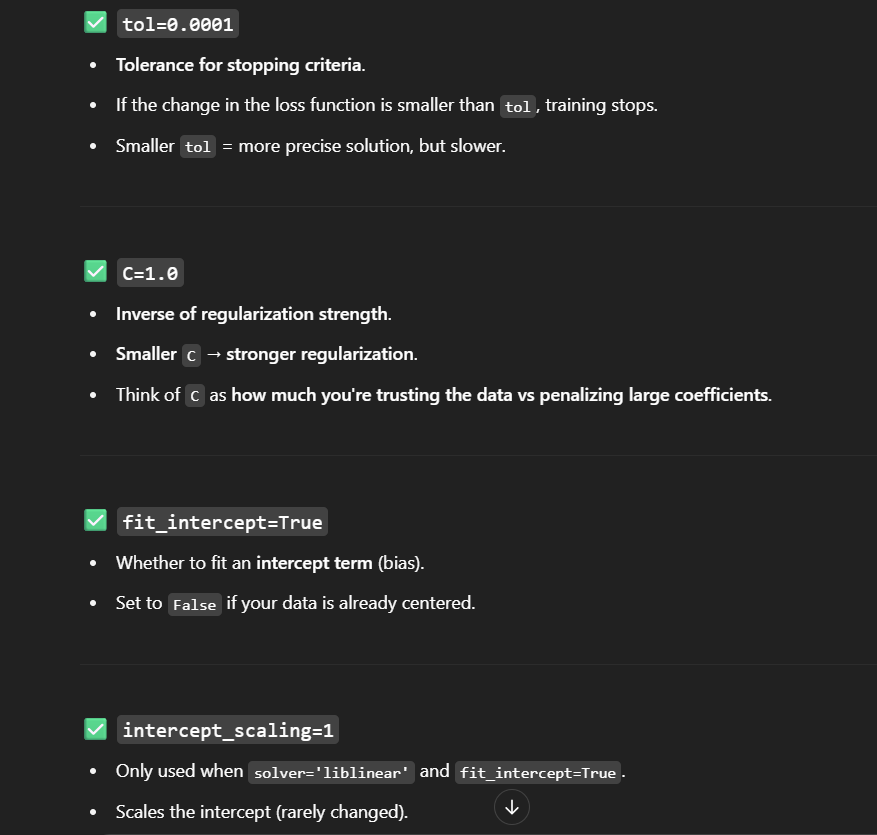
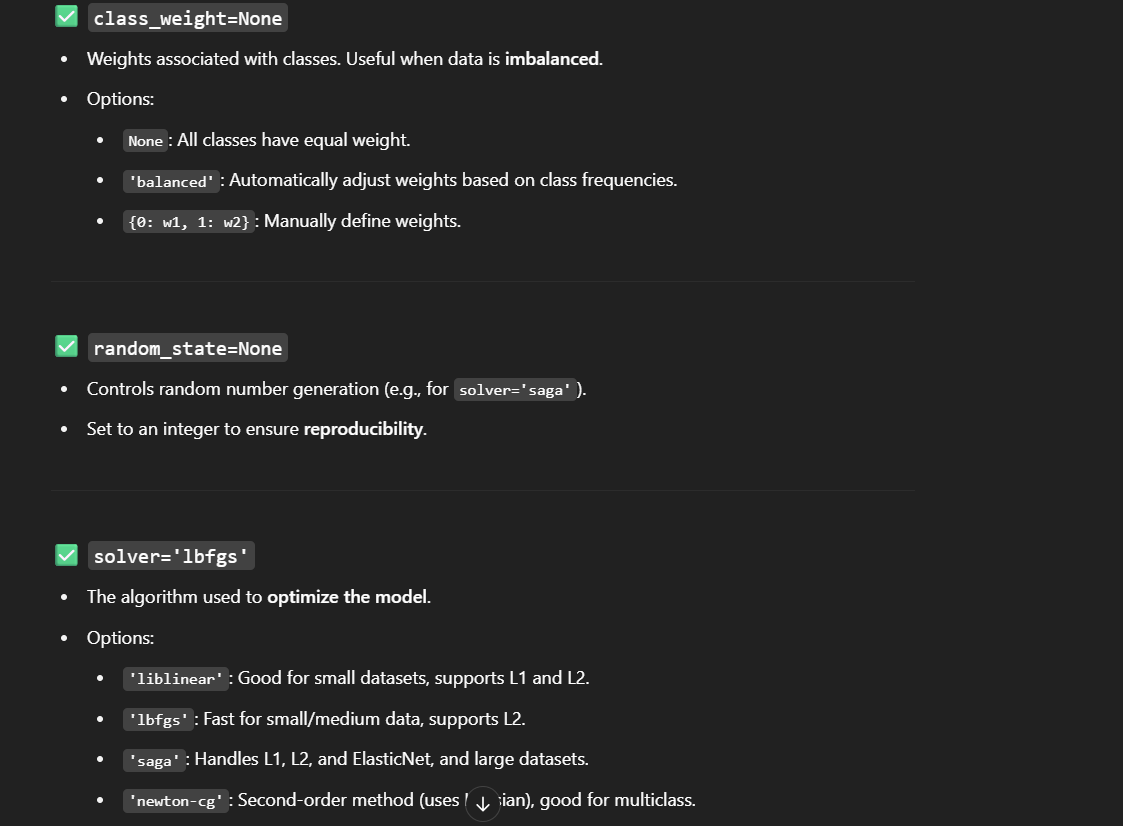
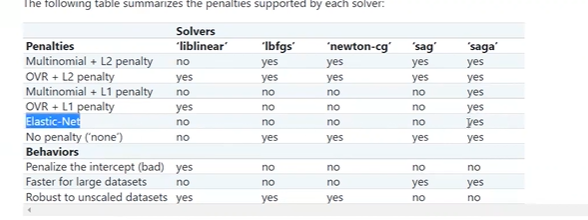
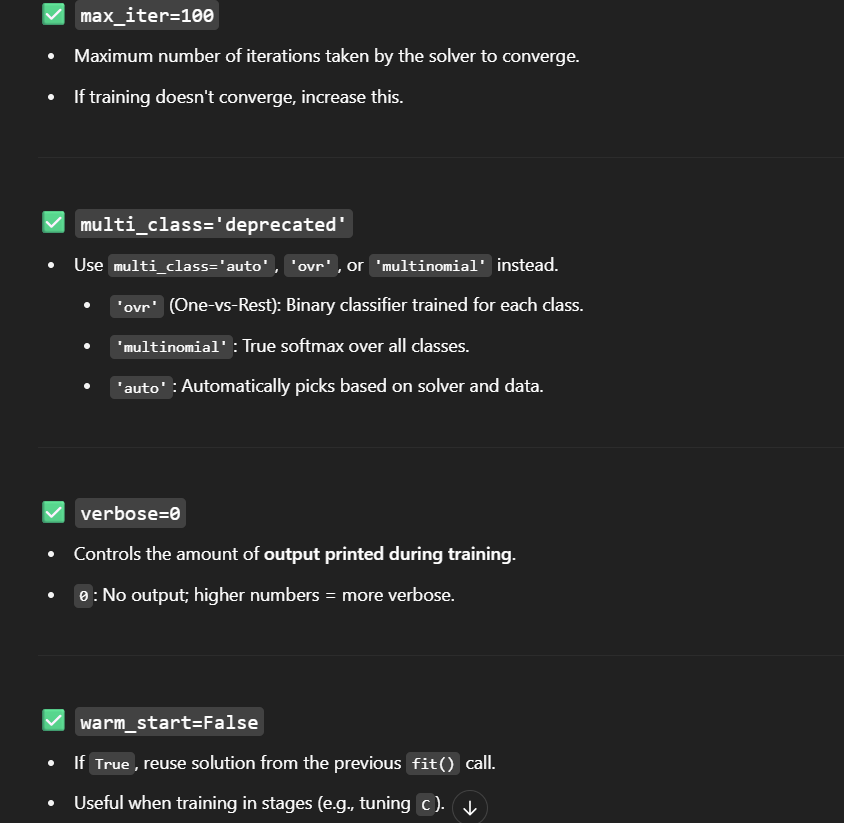
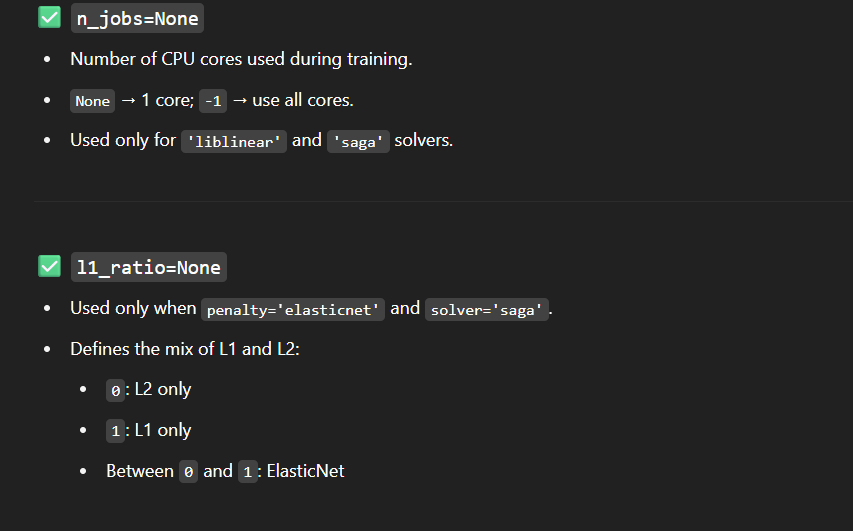

In [185]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [187]:
df = sns.load_dataset("titanic")

In [209]:
df.sample(5)

,Target,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
183,1,2,1,1.0,2,1,39.0000,2,1,0,0,5,2,1,0
867,0,1,1,31.0,0,0,50.4958,2,0,1,1,0,2,0,1
630,1,1,1,80.0,0,0,30.0000,2,0,1,1,0,2,1,1
796,1,1,0,49.0,0,0,25.9292,2,0,2,0,3,2,1,1
558,1,1,0,39.0,1,1,79.6500,2,0,2,0,4,2,1,0


<Axes: >

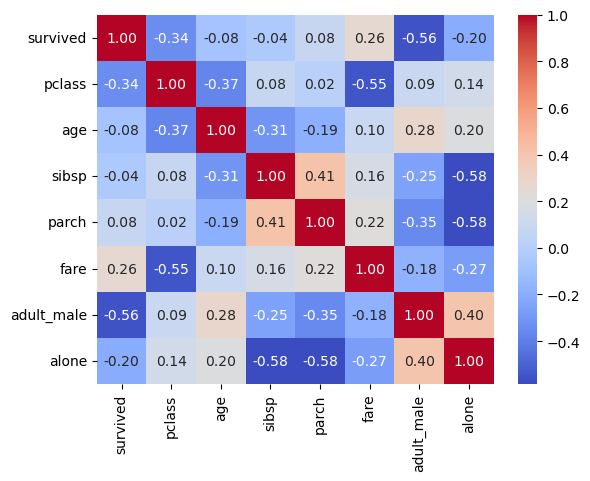

In [41]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm' ,fmt=".2f")

In [189]:
df = df.dropna()

In [191]:
df = df.rename(columns={"survived":"Target"})

In [193]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
col_enc = ['sex', 'embarked', 'class',	'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
df[col_enc] = df[col_enc].apply(lambda col: label_encoder.fit_transform(col))

In [215]:
X = df.iloc[:, 1:13]
y = df['Target']

In [217]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town
1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,2
6,1,1,54.0,0,0,51.8625,2,0,1,1,4,2
10,3,0,4.0,1,1,16.7000,2,2,0,0,6,2
11,1,0,58.0,0,0,26.5500,2,0,2,0,2,2


In [244]:
from sklearn.model_selection import cross_val_score, KFold

In [221]:
clf = LogisticRegression()

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=500)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print("Accuracy:", np.mean(scores))

Accuracy: 0.7467836257309941


## HyperParameter Tunning

In [242]:
from sklearn.model_selection import GridSearchCV

In [248]:
clf1 = LogisticRegression()

In [328]:
param_grid = {
    'C' : [0.1, 0.01, 1.0, 10, 100],
    'penalty' : ['l2', 'l1'], 
    'solver' : ['lbfgs','liblinear'],
}

In [330]:
clf2 = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(clf2, param_grid, cv=10, scoring='accuracy')

In [332]:
grid_search.fit(X_train, y_train)

C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = 

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.01, 1.0, 10, 100],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [320]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [322]:
best_model = grid_search.best_estimator_

In [326]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

Accuracy on Test Set: 0.7328767123287672
